<a href="https://colab.research.google.com/github/Bhavyaveer44/MiniProjML/blob/main/Handwritten_Digit_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical


In [2]:
from tensorflow.keras.datasets import mnist

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check shapes
print(f"Train Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)


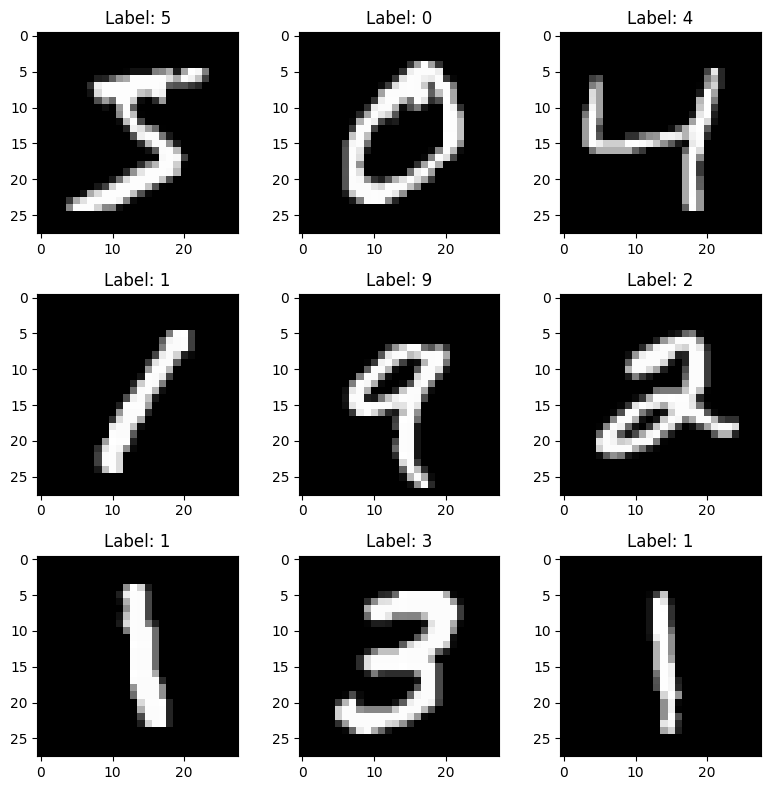

In [3]:
# Visualize some images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
plt.tight_layout()
plt.show()


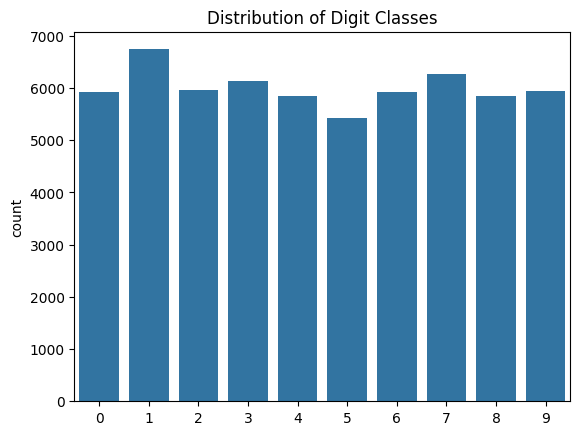

In [4]:
# Check class distribution
sns.countplot(x=y_train)
plt.title("Distribution of Digit Classes")
plt.show()


In [5]:
# Normalize pixel values (0 to 1 range)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten for Logistic Regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


Logistic Regression Accuracy: 0.9259


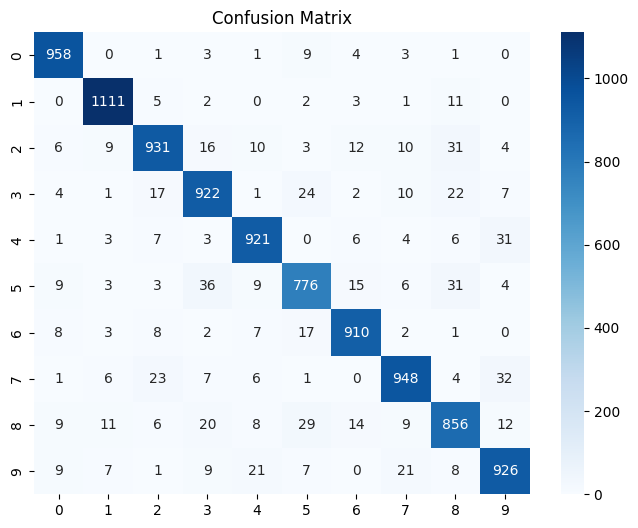

In [6]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_flat, y_train)

# Predict
y_pred = log_reg.predict(X_test_flat)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [7]:
# Reshape data for CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build CNN model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train_cat, epochs=5, validation_data=(X_test_cnn, y_test_cat))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 34ms/step - accuracy: 0.9138 - loss: 0.2766 - val_accuracy: 0.9838 - val_loss: 0.0485
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9875 - loss: 0.0425 - val_accuracy: 0.9900 - val_loss: 0.0320
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9896 - val_loss: 0.0313
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9942 - loss: 0.0187 - val_accuracy: 0.9911 - val_loss: 0.0286
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9896 - val_loss: 0.0319


In [8]:
# Evaluate on test set
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test_cat)
print(f"CNN Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9868 - loss: 0.0410
CNN Test Accuracy: 0.9896
